## In this notebook we will create service area boundaries for each park managed by the city of austin

In [1]:
import geopandas as gpd
import os
import getpass
import matplotlib.pyplot as plt
import re
import pandas as pd

In [7]:
wd = os.getcwd()
wd = wd[:wd.find('notebooks')]


coaparks = gpd.read_file(wd+"data/coaparks/BOUNDARIES_city_of_austin_parks.shp")
coaparks.crs = {'init': 'epsg:102739'}
coaparks.head()

,ASSET_MGMT,LOCATION_N,ADDRESS,CITY_MUNIC,COUNTY,STATE,STREET_NUM,STREET_NAM,STREET_TYP,ZIPCODE,...,MXPRIORITY,MXLOADID,GLOBALID,CREATED_BY,CREATED_DA,MODIFIED_B,MODIFIED_D,Shape__Are,Shape__Len,geometry
0,412,Stratford Overlook Greenbelt,"3006 Stratford Dr., Austin, Texas 78746",Austin,Travis,TX,3006,Stratford,Dr.,78746,...,0,None,None,CTM.Publisher,2019-10-12,CTM.Publisher,2019-10-12,4.403262e+03,420.672106,"POLYGON ((3099906.430145308 10076413.89003989,..."
1,413,Highland Neighborhood Park,"403 W St Johns Ave., Austin, Texas 78752",Austin,Travis,TX,403,W St Johns,Ave.,78752,...,0,None,None,CTM.Publisher,2019-10-12,CTM.Publisher,2019-10-12,1.048800e+04,422.279483,"POLYGON ((3123253.446115226 10095987.26952823,..."
2,354,Palma Plaza Pocket Park,"1524 Palma Plz., Austin, Texas 78703",Austin,Travis,TX,1524,Palma,Plz,78703,...,0,None,None,CTM.Publisher,2019-10-12,CTM.Publisher,2019-10-12,1.007678e+04,492.661534,"POLYGON ((3109560.790101632 10075621.8601279, ..."
3,398,Oertli Neighborhood Park,"12613 Blaine Rd., Austin, Texas 78753",Austin,Travis,TX,12613,Blaine,Rd.,78753,...,0,None,None,CTM.Publisher,2019-10-12,CTM.Publisher,2019-10-12,2.671883e+05,2404.916487,"POLYGON ((3142167.801987216 10117512.55423348,..."
4,370,Decker Tallgrass Prairie Preserve,"8001 Decker Ln., Austin, Texas 78724",Austin,Travis,TX,8001,Decker,Ln.,78724,...,0,None,None,CTM.Publisher,2019-10-12,CTM.Publisher,2019-10-12,1.515843e+07,26672.772067,"POLYGON ((3155053.00948447 10084108.4848869, 3..."


In [31]:
# Creation of buffers of for 1/4 mile (400 meters) and 1/2 a mile (800 meters)

# coaparks_quarter = coaparks.buffer(400)
# coaparks_half = coaparks.buffer(800)

#This is some code to convert the buffer into a proportion. This should change when we get
# Land use data. This was small enough to apply buffer rowwise. Could be made more efficiently
# in the future. 

total_area = coaparks['Shape__Are'].sum()
vector_proportion = (coaparks['Shape__Are'] / total_area) * 1600
print(list(vector_proportion))

x = lambda distance: coaparks.buffer(distance)

coapark_prop = coaparks.apply(x(i for i in vector_proportion))

[0.009481531822930754, 0.022583774273214872, 0.021698298025526003, 0.5753358073280556, 32.64060764399378, 3.688287238577564, 0.5127605150881764, 0.8938104337080508, 2.202441667665425, 0.09811075058021355, 0.6649334168971335, 0.48001932175605877, 0.2907800218576596, 3.9181766626368866, 0.39886874444364195, 0.10810896442178919, 1.7424466108415173, 13.794555867281014, 1.9068561842373488, 30.02966771565212, 0.16200780150515892, 0.16251375488800074, 0.3312855091922777, 0.2349291366068429, 2.788077541593255, 1.8057327267262373, 0.22866095528999006, 0.013873392066295799, 1.8411852032118154, 12.764531203067639, 0.9118375910489936, 5.062460852931743, 0.19594679172660745, 0.9285364751407935, 1.3231158722754406, 0.2403465383614032, 1.1679124273345174, 0.8506457713342961, 104.04698276419077, 4.475803508569996, 7.435974833388098, 0.5648901786688608, 0.437600633922626, 0.3972107685614423, 0.3942421369360442, 0.38922799478603054, 7.877758689012778, 0.6542563087741712, 0.27212123763275975, 0.997633402

ArgumentError: argument 3: <class 'TypeError'>: wrong type

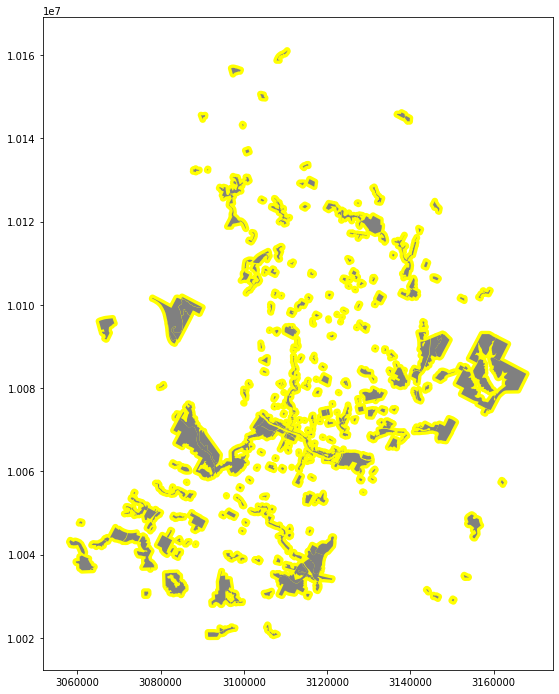

In [4]:
#plot
fig, ax = plt.subplots(figsize=(12,12))
#vastra.plot(ax=ax)
coaparks_quarter.plot(ax=ax, color='red')
coaparks_half.plot(ax=ax, color='yellow')
coaparks.plot(ax=ax, color='grey');

In [5]:
#to shapefile
coaparks.to_file(wd+"data/coaparks_buffer/parksbuff.shp")
